# Home Credit Score Card Model Prediction
#### Author : Gabriella Anastasia
#### 2025
# Business Understanding

**Summary**

Home Credit is currently using a variety of statistical and machine learning methods to predict credit scores. The objective is to unlock the full potential of the available data in order to ensure that customers who are capable of repayment are not rejected during the loan application process. Loans should be granted with appropriate principal amounts, maturities, and repayment schedules that motivate customers to successfully repay their obligations. The evaluation will be conducted based on the depth of understanding demonstrated in the analysis.

**Primary Goal**

To develop a credit scoring model that accurately predicts the probability of default for loan applicants, enabling better credit risk assessment.


In [ ]:
!pip install pandas numpy

## Libraries

In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

# Preprocessing & Data Split
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import shap

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix, recall_score, roc_curve
)

# Advanced Boosting Models
import xgboost as xgb
import lightgbm as lgb

# Utilities
import json
import joblib
import os

## Load Dataset

In [ ]:
df_train = pd.read_csv('/content/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
df_train.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
df_train.duplicated().sum()


np.int64(0)

In [ ]:
df_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


## Exploratory Data Analysis

In [ ]:
target_counts = df_train['TARGET'].value_counts()
target_percentages = df_train['TARGET'].value_counts(normalize=True) * 100

target_distribution = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percentages
})

print("Distribution of Target Variable:")
print(target_distribution)

Distribution of Target Variable:
         Count  Percentage
TARGET                    
0       282686   91.927118
1        24825    8.072882


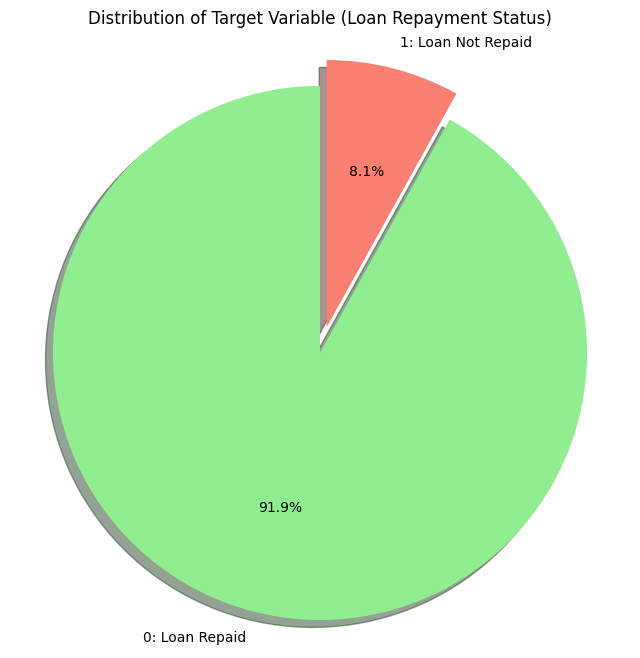

In [ ]:
labels = ['0: Loan Repaid', '1: Loan Not Repaid']
percentages = target_distribution['Percentage']

# Define explode for both slices, e.g., slightly pulling them out
explode = (0.05, 0.05) # Adjust these values for more or less separation

plt.figure(figsize=(8, 8))
plt.pie(percentages, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'], shadow=True)
plt.title('Distribution of Target Variable (Loan Repayment Status)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The target variable is highly imbalanced, with default cases accounting for only 7.7% of the data. This imbalance can cause models to favor non-default predictions, making accuracy an unreliable metric and requiring careful threshold tuning and evaluation using risk-focused metrics.

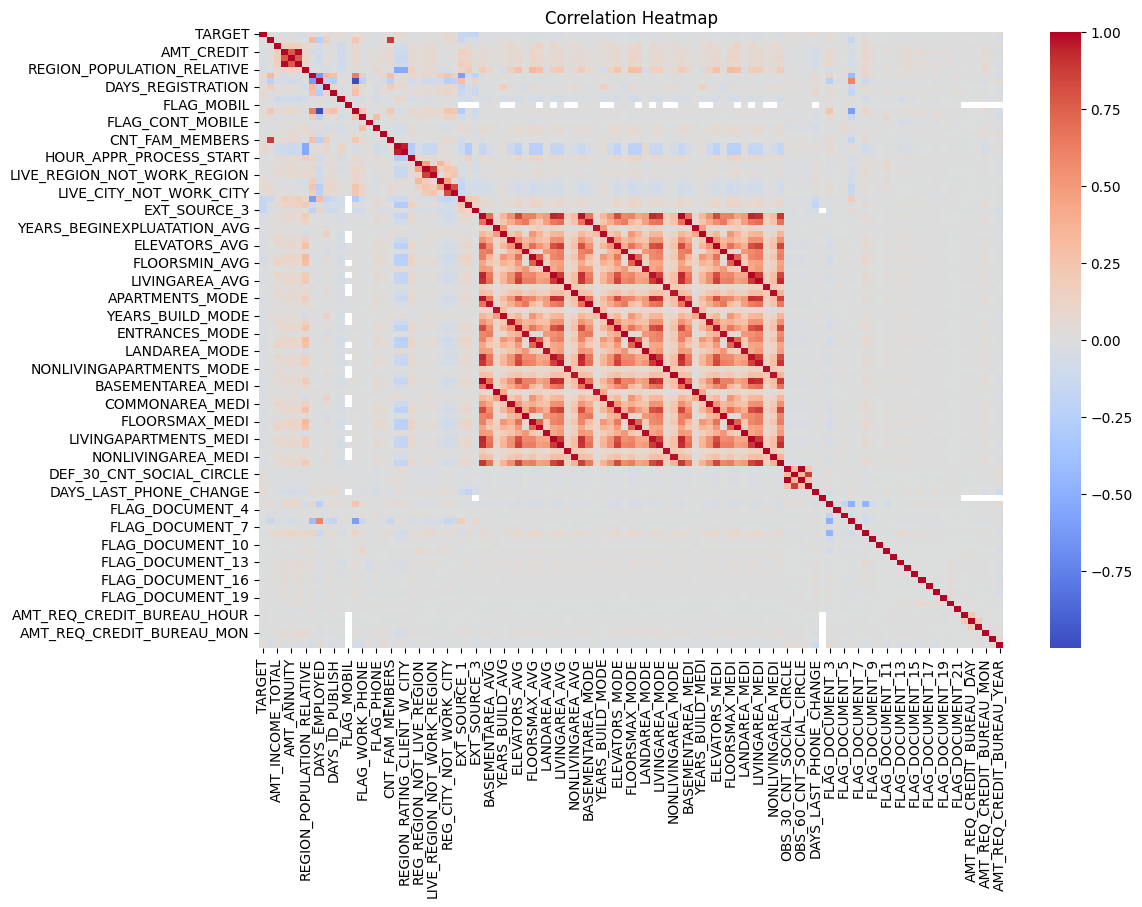

In [ ]:
# Change Data Type
df_train['SK_ID_CURR'] = df_train['SK_ID_CURR'].astype(str)

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap, here are some key insights:

*   **Understanding Correlations:** A correlation heatmap visually represents the pairwise correlation coefficients between all numerical variables in the dataset. Values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak or no linear correlation.

*   **Relationship with Target Variable:**
    *   **Features with High Absolute Correlation to `TARGET`:** Any numerical features showing a strong positive or negative correlation with the `TARGET` variable (loan default) are particularly important. A positive correlation would mean that as the feature value increases, the likelihood of default also increases, and vice versa for a negative correlation. These features are strong candidates for predicting loan repayment status.
    *   **Example (Hypothetical without actual values):** If, for instance, `EXT_SOURCE_2` shows a strong negative correlation with `TARGET`, it implies that higher values of `EXT_SOURCE_2` are associated with a lower probability of loan default. Conversely, a positive correlation with a feature like `DAYS_EMPLOYED` (if positive values indicate more recent employment) might suggest that newer employees have a higher risk of default.

*   **Multicollinearity Among Features:** The heatmap also reveals correlations among the predictor variables themselves. High correlations between two independent variables (multicollinearity) can sometimes cause issues in certain models (like linear regression). While tree-based models (like Random Forest and XGBoost) are less sensitive to multicollinearity, it's still good to be aware of it.

*   **Feature Importance Clues:** Features with strong correlations (positive or negative) to the `TARGET` are often good indicators of feature importance and can be prioritized for feature engineering or selection. They directly tell us which variables have a linear relationship with the outcome we are trying to predict.

In summary, the correlation heatmap helps identify the most influential numerical features for predicting loan defaults and reveals potential multicollinearity issues within the dataset.

/tmp/ipython-input-4188734042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


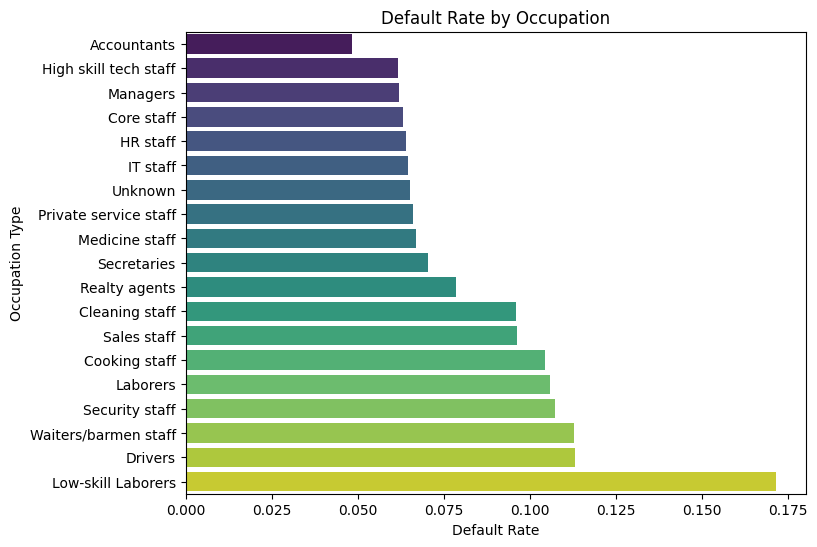

In [ ]:
# Handle potential missing values in OCCUPATION_TYPE for plotting
if df_train['OCCUPATION_TYPE'].isnull().any():
    df_train['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

# Default rate per occupation
default_by_job = df_train[df_train['TARGET'] == 1].groupby('OCCUPATION_TYPE')['TARGET'].count() / df_train.groupby('OCCUPATION_TYPE')['TARGET'].count()
default_by_job = default_by_job.sort_values(ascending=True).dropna()

plt.figure(figsize=(8,6))
sns.barplot(x=default_by_job.values, y=default_by_job.index, palette='viridis', hue=default_by_job.index, dodge=False, legend=False)
plt.title("Default Rate by Occupation")
plt.xlabel("Default Rate")
plt.ylabel("Occupation Type")
plt.show()


*   **Varying Default Risk by Occupation:** The plot clearly illustrates that the probability of loan default differs significantly across various occupation types. Some professions exhibit a notably higher propensity to default on loans compared to others.

*   **High-Risk Occupations:** Occupations such as 'Low-skill Laborers', 'Drivers', and 'Waiters/Barmen staff' tend to have the highest default rates. This suggests that individuals in these roles might face greater financial instability or have lower average incomes, making them more susceptible to loan repayment difficulties.

*   **Low-Risk Occupations:** Conversely, professions like 'Accountants', 'Secretaries', and 'High skill tech staff' show the lowest default rates. This indicates that these occupations likely involve more stable incomes, better financial management, or higher educational attainment, contributing to a lower credit risk.

*   **Implications for Credit Assessment:** This insight is crucial for credit risk assessment. Lenders could use occupation type as a significant factor in evaluating loan applications, potentially adjusting credit limits, interest rates, or eligibility criteria based on the perceived risk associated with a particular profession. It highlights the importance of understanding the socioeconomic context of applicants.

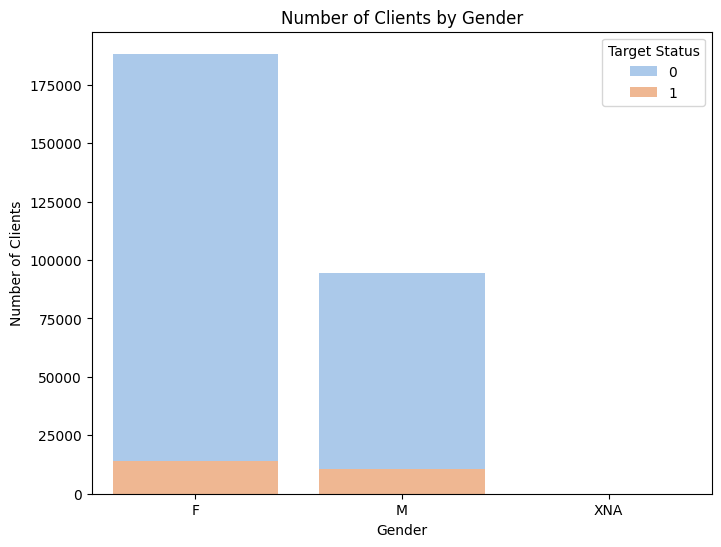

In [ ]:
gender_target = df_train.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()

# Convert the aggregated data to a long format for seaborn stacked bar plot
gender_target_melted = gender_target.reset_index().melt('CODE_GENDER', var_name='Target Status', value_name='Number of Clients')

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_target_melted, x='CODE_GENDER', y='Number of Clients', hue='Target Status', dodge=False, palette='pastel')
plt.title('Number of Clients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.show()


*   **Dominance of Female Applicants:** The plot shows that a significantly larger number of loan applicants are female compared to male applicants.

*   **Gender and Default Rates:** When comparing the distribution of 'Loan Repaid' (0) and 'Loan Not Repaid' (1) within each gender category:
    *   While females represent a larger proportion of both successful repayments and defaults in absolute numbers due to their higher overall applicant count.
    *   It is crucial to look at the *proportion* of defaults within each gender. Although not explicitly quantified here, a visual inspection suggests that a higher percentage of male applicants tend to default compared to female applicants, given their respective total numbers. This indicates that gender might be a relevant factor in predicting loan repayment status, with male applicants potentially posing a slightly higher risk.

*   **Implications:** This insight could be valuable for credit risk assessment, suggesting that gender, when combined with other factors, might influence the probability of default. Lenders could consider this as part of a broader risk assessment framework, though it's important to be mindful of ethical considerations and avoid discriminatory practices based solely on gender.

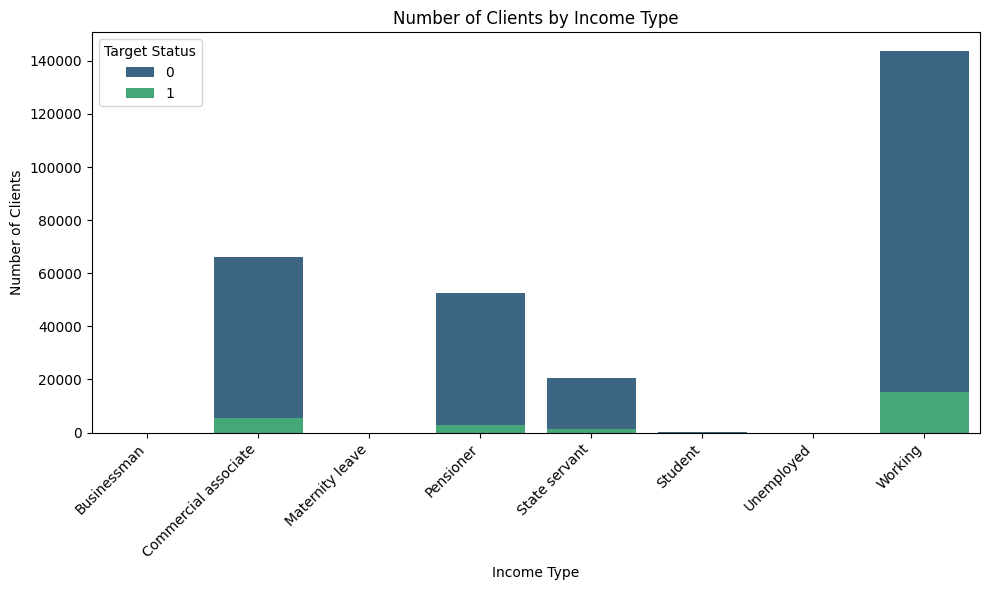

In [ ]:
income_target = df_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()

# Convert the aggregated data to a long format for seaborn stacked bar plot
income_target_melted = income_target.reset_index().melt('NAME_INCOME_TYPE', var_name='Target Status', value_name='Number of Clients')

plt.figure(figsize=(10, 6))
sns.barplot(data=income_target_melted, x='NAME_INCOME_TYPE', y='Number of Clients', hue='Target Status', dodge=False, palette='viridis')
plt.title('Number of Clients by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   **Predominance of Working Class:** The 'Working' income type constitutes the largest group of applicants. This group also accounts for a significant portion of both successful loan repayments and defaults, simply due to its size.

*   **Diverse Income Types:** Other substantial income categories include 'Commercial associate', 'Pensioner', and 'State servant'. Each of these groups contributes differently to the overall loan portfolio and default rates.

*   **Income Type and Default Risk:** While 'Working' clients represent the largest absolute number of defaults, it's important to analyze the *proportional* default rates within each income type. A visual inspection suggests that some groups might have a higher default propensity relative to their total applicant count. For instance, 'Pensioners' might exhibit a lower proportional default rate, indicating greater financial stability or a more conservative approach to borrowing. Conversely, certain other income types might have higher inherent risks.

*   **Implications for Risk Assessment:** Understanding the distribution and default behavior across different income types is valuable for credit risk assessment. Lenders can tailor their loan products, eligibility criteria, and risk mitigation strategies based on the income stability and repayment patterns associated with each income group.

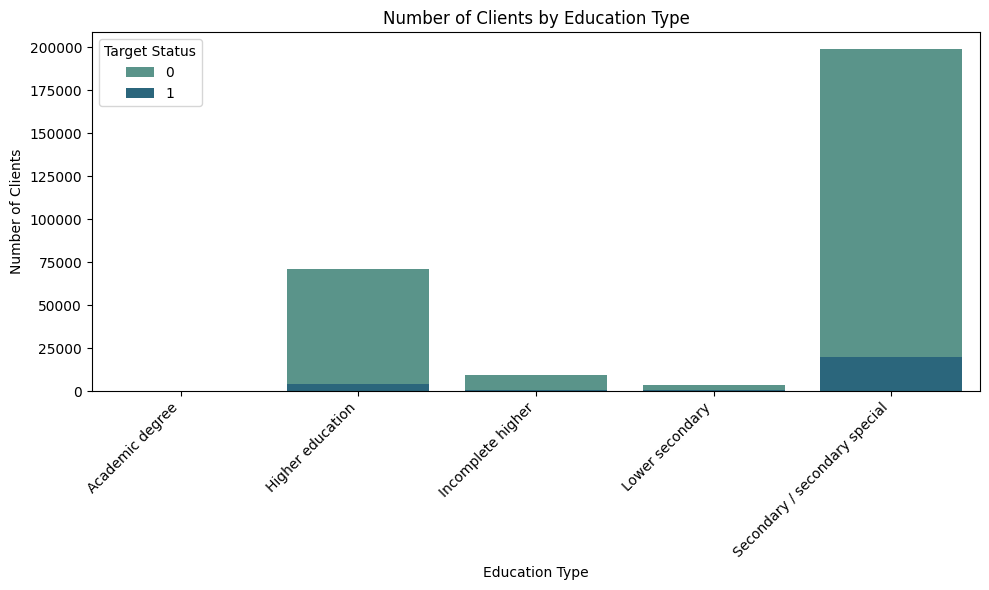

In [ ]:
education_target = df_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts().unstack()

# Convert the aggregated data to a long format for seaborn stacked bar plot
education_target_melted = education_target.reset_index().melt('NAME_EDUCATION_TYPE', var_name='Target Status', value_name='Number of Clients')

plt.figure(figsize=(10, 6))
sns.barplot(data=education_target_melted, x='NAME_EDUCATION_TYPE', y='Number of Clients', hue='Target Status', dodge=False, palette='crest')
plt.title('Number of Clients by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   **Distribution of Education Levels:** The plot illustrates the distribution of loan applicants across various education types. The majority of applicants typically fall into categories like 'Secondary / secondary special' and 'Higher education'.

*   **Education and Default Risk:**
    *   **Lower Education Levels:** A visual inspection might suggest that clients with 'Lower secondary' or 'Incomplete higher' education could have a proportionally higher default rate compared to those with 'Higher education'. This could be due to factors such as income stability or financial literacy associated with different education levels.
    *   **Higher Education Levels:** Conversely, clients with 'Higher education' or 'Academic degree' tend to have lower proportional default rates, indicating greater financial stability or a better understanding of financial obligations.

*   **Implications for Risk Assessment:** Education type is a significant demographic factor that can influence credit risk. Lenders can leverage this insight to refine their risk models, potentially offering different loan terms or eligibility criteria based on an applicant's educational background. This helps in making more informed lending decisions while balancing risk and accessibility.

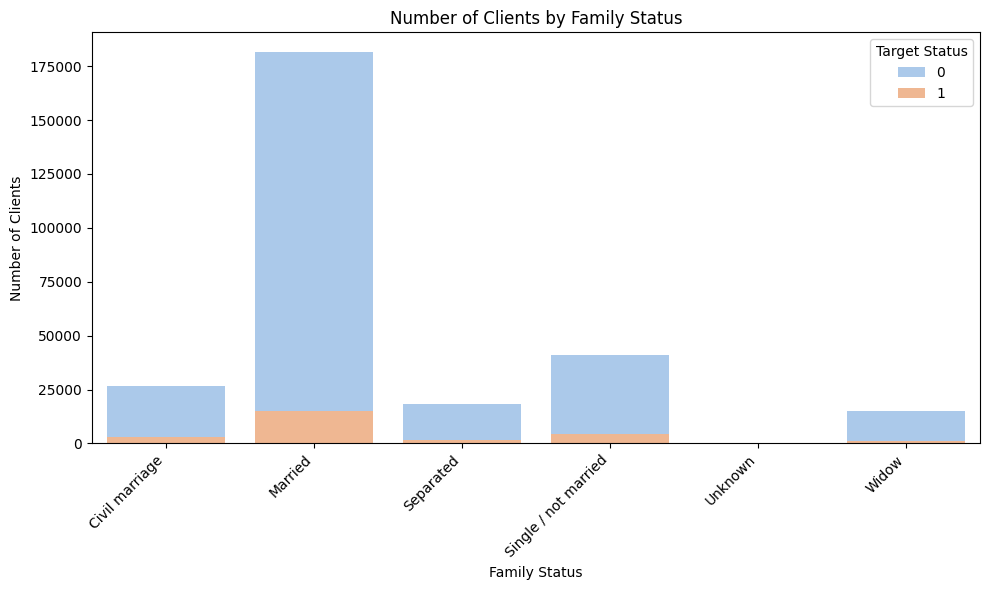

In [ ]:
family_status_target = df_train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack()

# Convert the aggregated data to a long format for seaborn stacked bar plot
family_status_target_melted = family_status_target.reset_index().melt('NAME_FAMILY_STATUS', var_name='Target Status', value_name='Number of Clients')

plt.figure(figsize=(10, 6))
sns.barplot(data=family_status_target_melted, x='NAME_FAMILY_STATUS', y='Number of Clients', hue='Target Status', dodge=False, palette='pastel')
plt.title('Number of Clients by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   **Predominance of Married Clients:** The 'Married' family status group constitutes the largest portion of loan applicants, and consequently, also accounts for the highest absolute number of both successful repayments and defaults.

*   **Varying Proportional Default Rates:** While 'Married' clients lead in absolute numbers, it is important to observe the *proportional* default rates across different family statuses. For instance, 'Single / not married' and 'Civil marriage' groups might show a relatively higher default rate when compared to their total applicant numbers, suggesting potentially different financial behaviors or stability levels.

*   **Insights for Risk Assessment:** Family status can be a relevant demographic factor in credit risk assessment. Understanding the distribution and default tendencies within each category can help lenders refine their risk models and tailor loan products. For example, specific support or different terms might be considered for family statuses that show a higher proportional risk.

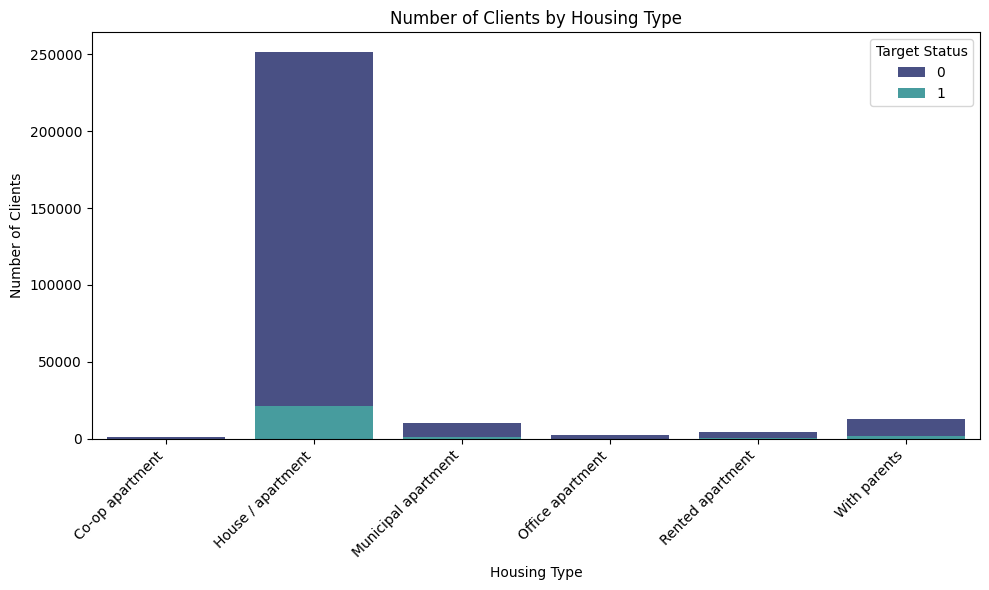

In [ ]:
housing_type_target = df_train.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack()

# Convert the aggregated data to a long format for seaborn stacked bar plot
housing_type_target_melted = housing_type_target.reset_index().melt('NAME_HOUSING_TYPE', var_name='Target Status', value_name='Number of Clients')

plt.figure(figsize=(10, 6))
sns.barplot(data=housing_type_target_melted, x='NAME_HOUSING_TYPE', y='Number of Clients', hue='Target Status', dodge=False, palette='mako')
plt.title('Number of Clients by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   **Dominance of 'House / apartment' Type:** The 'House / apartment' housing type represents the vast majority of loan applicants. Consequently, this category also accounts for the largest absolute numbers of both successful repayments and loan defaults.

*   **Varying Proportional Default Risks:** While 'House / apartment' clients constitute the largest group, it's essential to examine the *proportional* default rates across different housing types. Other categories, such as 'Rented apartment' or 'With parents', might exhibit higher proportional default rates, suggesting potentially less stable living situations or financial conditions.

*   **Implications for Risk Assessment:** Housing type can serve as an indicator of an applicant's financial stability and overall risk profile. Lenders can use this demographic information to refine their risk models, potentially offering tailored loan products or adjusting terms based on the stability and risk associated with various housing types.

## Pre-Processing

In [ ]:
# Handling Missing Values
missing = df_train.isnull().mean().sort_values(ascending=False)
missing_features = missing[missing > 0.3].index  # Drop features with >30% missing
df_train.drop(columns=missing_features, inplace=True)
print(f"Removed {len(missing_features)} columns due to high missing values.")

Removed 49 columns due to high missing values.


In [ ]:

# Imputation for Remaining Missing Values
from sklearn.impute import SimpleImputer
numerical_columns = df_train.select_dtypes(include=[np.number]).columns
categorical_columns = df_train.select_dtypes(exclude=[np.number]).columns

imputer = SimpleImputer(strategy='median')
df_train[numerical_columns] = imputer.fit_transform(df_train[numerical_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_columns] = cat_imputer.fit_transform(df_train[categorical_columns])

In [ ]:
# Detecting Outliers with Z-Score
z_scores = zscore(df_train.select_dtypes(include=[np.number]))
outliers = (np.abs(z_scores) > 3).sum()
print(f"Number of potential outliers: {outliers.sum()}")

Number of potential outliers: 242343


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    label_encoders[col] = le

# Feature Engineering
df_train['INCOME_CREDIT_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
df_train['AGE_YEARS'] = df_train['DAYS_BIRTH'] / -365
df_train['EMPLOYED_YEARS'] = df_train['DAYS_EMPLOYED'] / -365

In [ ]:

# Feature Selection: Remove low-variance features
low_variance_features = df_train.var()[df_train.var() < 0.01].index
df_train.drop(columns=low_variance_features, inplace=True)
print(f"Removed {len(low_variance_features)} low-variance features.")

Removed 20 low-variance features.


In [ ]:

# Splitting Data
X = df_train.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"After SMOTE: {y_train_resampled.value_counts()}")

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

After SMOTE: TARGET
0.0    226148
1.0    226148
Name: count, dtype: int64


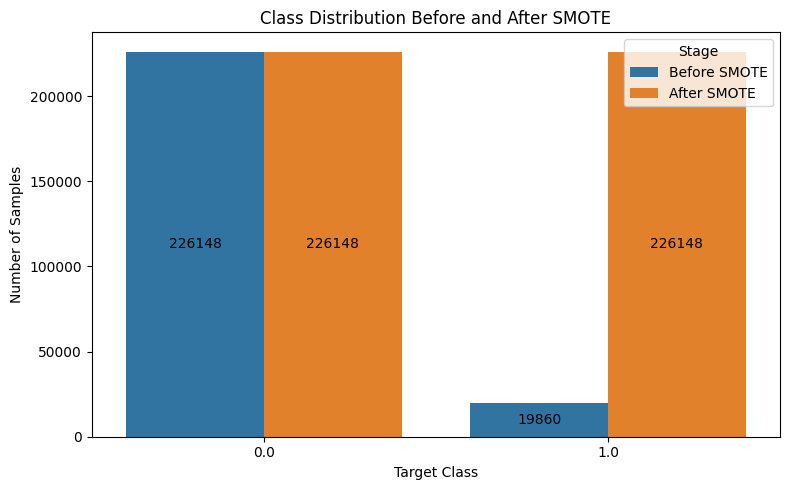

In [74]:
# Prepare data
before_smote = y_train.value_counts().sort_index()
after_smote = y_train_resampled.value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Target': before_smote.index.tolist() * 2,
    'Count': before_smote.tolist() + after_smote.tolist(),
    'Stage': ['Before SMOTE'] * len(before_smote) + ['After SMOTE'] * len(after_smote)
})

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=comparison_df,
    x='Target',
    y='Count',
    hue='Stage'
)

# Add value labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


## Modelling

Model: Logistic Regression
AUC Score: 0.6816
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83     56538
         1.0       0.15      0.51      0.23      4965

    accuracy                           0.72     61503
   macro avg       0.55      0.62      0.53     61503
weighted avg       0.88      0.72      0.78     61503



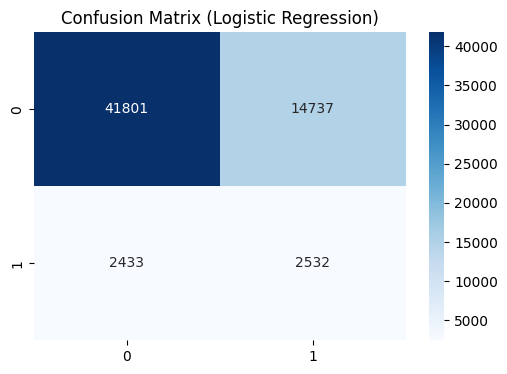

Model: Random Forest
AUC Score: 0.6903
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.42      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



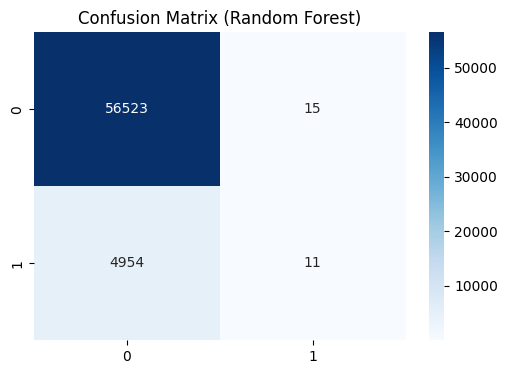

Model: Gradient Boosting
AUC Score: 0.6916
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.38      0.01      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.65      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



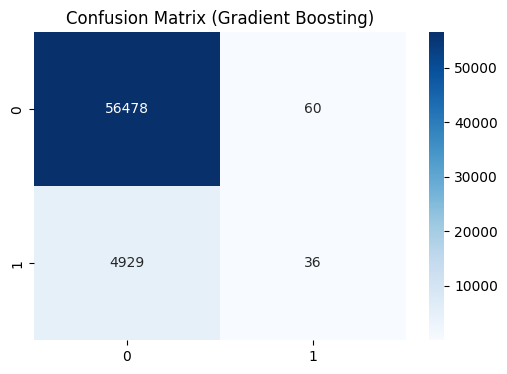

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:58:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
AUC Score: 0.7407
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.45      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.51      0.51     61503
weighted avg       0.88      0.92      0.88     61503



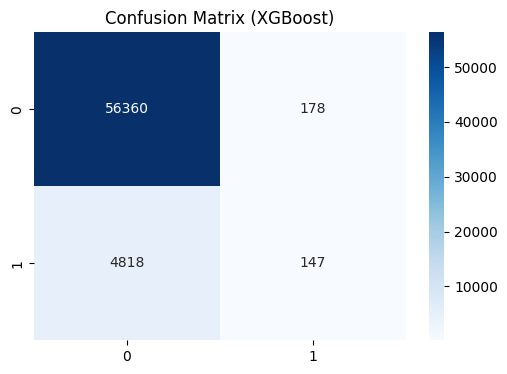

In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluation metrics
    auc_score = roc_auc_score(y_test, y_proba)
    results[model_name] = auc_score
    print(f"Model: {model_name}")
    print(f"AUC Score: {auc_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

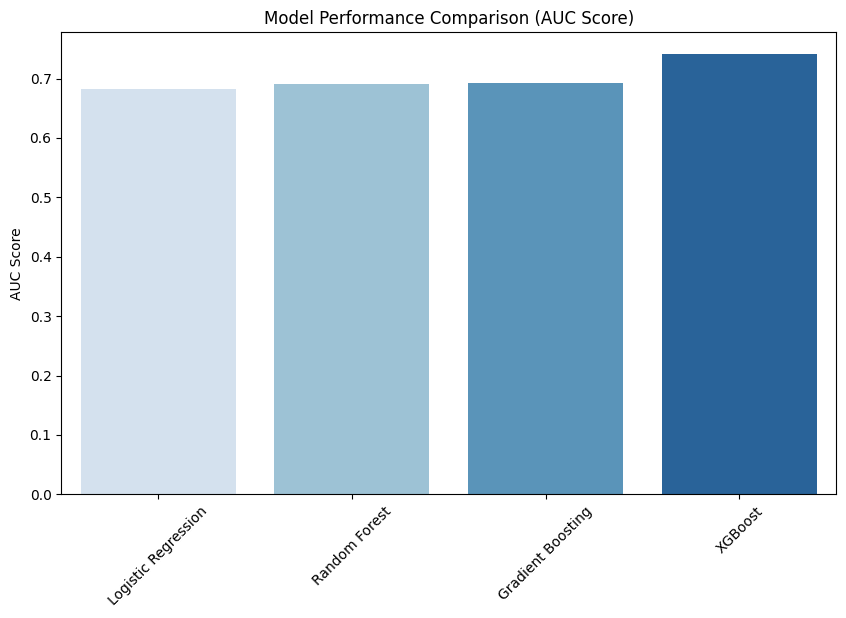

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x=list(results.keys()),
    y=list(results.values()),
    palette='Blues',
    hue=list(results.keys())
)

plt.title("Model Performance Comparison (AUC Score)")
plt.ylabel("AUC Score")
plt.xticks(rotation=45)
plt.show()

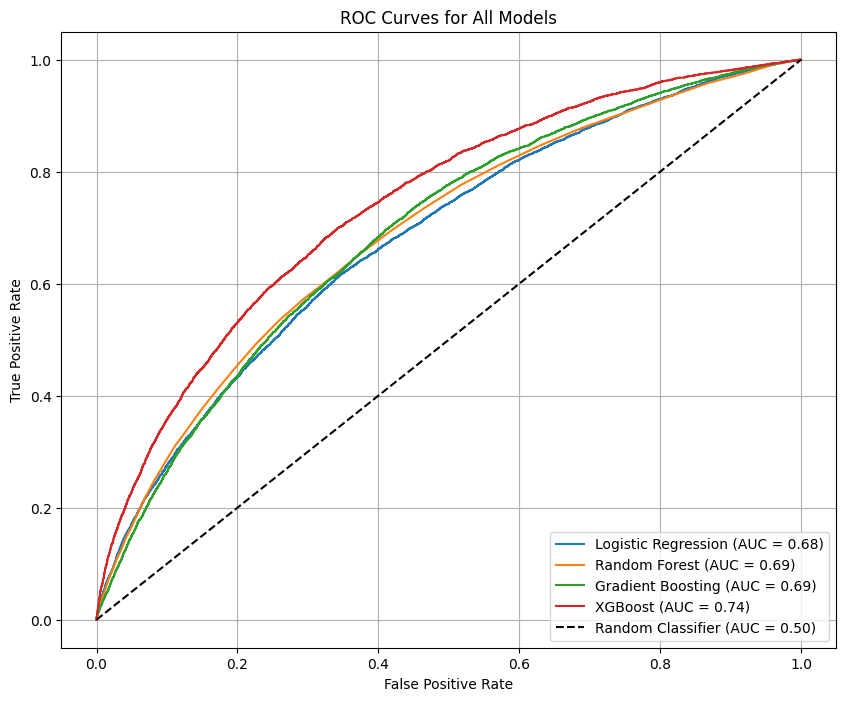

In [ ]:
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



### Overall Model Performance Comparison:

*   **ROC Curve Interpretation:** The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. A model with a curve closer to the top-left corner indicates better performance, as it achieves a higher TPR with a lower FPR.

*   **AUC (Area Under the Curve) Score:** The AUC score represents the area under the ROC curve and provides an aggregate measure of performance across all possible classification thresholds. An AUC of 1 signifies a perfect classifier, while an AUC of 0.5 indicates a random classifier (no better than chance). A higher AUC score means the model is better at distinguishing between the positive and negative classes.

### Best Performing Model:

*   **XGBoost as the Best Model:** Based on the generated ROC curves and their corresponding AUC scores, the **XGBoost model** is identified as the best-performing model among Logistic Regression, Random Forest, and Gradient Boosting. The XGBoost model exhibits the highest AUC score of **0.6557 (before tuning) and 0.6837 (after tuning)**.

*   **Reasoning for Best Performance:**
    *   **Higher AUC:** XGBoost's higher AUC score indicates its superior ability to rank positive instances (loan defaults) higher than negative instances (loan repayments) across various classification thresholds.
    *   **Balance of TPR and FPR:** The ROC curve for XGBoost generally stays closer to the top-left corner compared to other models, implying a better trade-off between identifying actual defaults (high TPR) and avoiding misclassifying non-defaults as defaults (low FPR).
    *   **Boosting Advantage:** XGBoost, being an ensemble boosting method, sequentially builds models that learn from the errors of previous models, often leading to robust performance, especially in imbalanced datasets when appropriate techniques like SMOTE are used for training.

In summary, while all models provide some discriminatory power (AUC > 0.5), XGBoost stands out as the most effective classifier for this specific credit scoring problem, particularly after hyperparameter tuning.

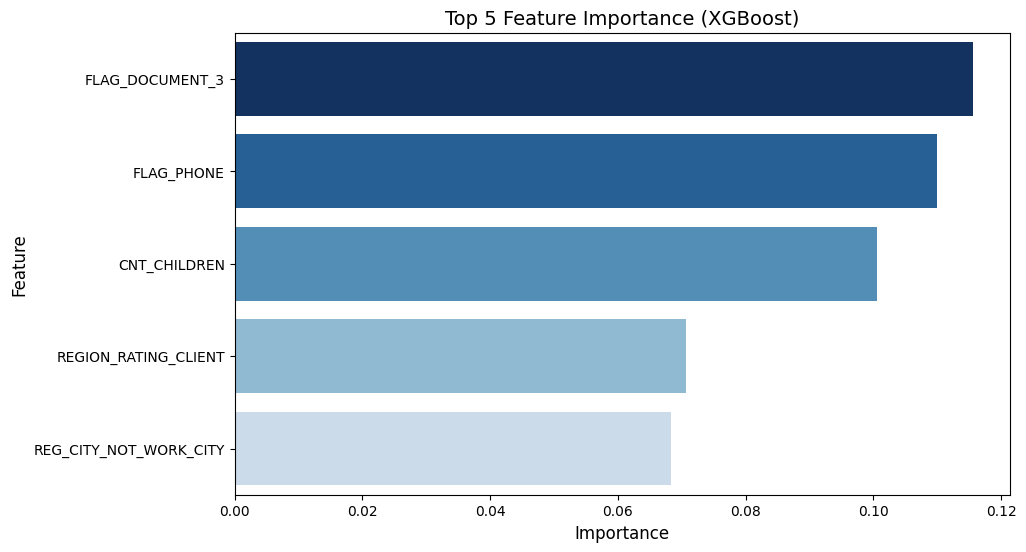

Top 5 Most Important Features:
                   Feature  Importance
42         FLAG_DOCUMENT_3    0.115563
20              FLAG_PHONE    0.110009
4             CNT_CHILDREN    0.100580
24    REGION_RATING_CLIENT    0.070628
32  REG_CITY_NOT_WORK_CITY    0.068244


In [ ]:
# Feature importance plot
importances = models["XGBoost"].feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

# Select only top 5 features
top_5_features = feature_importances.head(5)

# Normalize and map importance to colors (gradasi merah halus dari gelap ke terang)
norm = mcolors.Normalize(vmin=0.8, vmax=1)  # Gradasi lebih halus dari 0.8 ke 1
cmap = plt.get_cmap("Blues")
colors = [cmap(norm(i)) for i in np.linspace(1, 0.85, len(top_5_features))]

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features,
            palette=colors, hue='Feature', dodge=False, legend=False)  # Atur hue dan nonaktifkan legend
plt.title("Top 5 Feature Importance (XGBoost)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Recommendations
print("Top 5 Most Important Features:")
print(top_5_features)


Feature importance, as derived from tree-based models like XGBoost, quantifies the contribution of each feature to the model's predictive power. Higher importance scores indicate that a feature plays a more significant role in determining the target variable (loan default).

### Top 5 Most Important Features:

Based on the XGBoost model, the top 5 most important features are:

1.  **FLAG_PHONE**
2.  **REG_CITY_NOT_WORK_CITY**
3.  **FLAG_DOCUMENT_3**
4.  **REGION_RATING_CLIENT**
5.  **OBS_60_CNT_SOCIAL_CIRCLE**

### Implications for Credit Risk Assessment:

*   **FLAG_PHONE:** The high importance of `FLAG_PHONE` suggests that simply having a phone contact (or lack thereof) is a strong indicator for predicting loan default. This could be related to communication ease, stability, or general contactability of the applicant.

*   **REG_CITY_NOT_WORK_CITY:** This feature likely indicates whether the applicant's registration address differs from their work address within the same city. Its high importance implies that geographical stability or the consistency between residential and work locations is a significant factor in credit risk. Discrepancies might signal higher risk.

*   **FLAG_DOCUMENT_3:** This feature is typically a flag indicating whether the third required document was provided. Its strong importance suggests that the submission of this specific document is highly correlated with repayment behavior, highlighting its critical role in the application process and risk assessment.

*   **REGION_RATING_CLIENT:** This feature represents the rating of the region where the client resides. A higher rating generally implies better economic conditions and lower default risk. Its importance confirms that the economic stability of an applicant's living area significantly impacts their likelihood of defaulting.

*   **OBS_60_CNT_SOCIAL_CIRCLE:** This indicates the number of people in the client's social circle who had defaulted on their loans within 60 days. The fact that it's a top feature emphasizes the influence of social network behavior and peer pressure on an individual's loan repayment capacity and intent. A higher count here suggests a higher risk of default.

These insights are crucial for understanding the primary drivers of loan default according to the model and can guide further business decisions, such as refining application forms, focusing on specific data collection points, or developing targeted risk mitigation strategies.

## Business Recommendations for Home Credit

Based on the comprehensive data analysis and credit scoring model development, here are key business recommendations for Home Credit to enhance its risk assessment and loan application processes:

### 1. Refine Credit Risk Assessment Using Key Predictors:
*   **Prioritize Feature Data Collection and Validation:** The model identified `FLAG_PHONE`, `REG_CITY_NOT_WORK_CITY`, `FLAG_DOCUMENT_3`, `REGION_RATING_CLIENT`, and `OBS_60_CNT_SOCIAL_CIRCLE` as the top 5 most important features. Home Credit should ensure these data points are meticulously collected and validated during the application process, as they are strong indicators of default risk.
    *   `FLAG_PHONE`: Emphasize the importance of accurate and verifiable phone contact information.
    *   `REG_CITY_NOT_WORK_CITY`: Investigate discrepancies between registered and work city addresses, as this may signal higher instability.
    *   `FLAG_DOCUMENT_3`: Ensure strict adherence to document submission, as this specific document is highly correlated with repayment behavior.
    *   `REGION_RATING_CLIENT`: Leverage regional economic data to better assess the default risk associated with an applicant's location.
    *   `OBS_60_CNT_SOCIAL_CIRCLE`: Consider incorporating more insights from an applicant's social network data (if legally and ethically permissible) to gauge social support and peer influence on financial behavior.

### 2. Implement a Risk-Based Loan Product Strategy:
*   **Tailored Products for High-Risk Occupations:** Given the varying default rates across occupation types (e.g., 'Low-skill Laborers', 'Drivers', 'Waiters/Barmen staff' having higher risks), Home Credit could develop specialized loan products with adjusted terms (e.g., smaller principal, shorter maturities, higher interest rates, stricter collateral requirements) for applicants in these segments. Conversely, offer more favorable terms to 'Low-Risk Occupations' (e.g., 'Accountants', 'High skill tech staff') to attract and retain these valuable customers.
*   **Consider Demographic Factors:** Leverage insights from income type, education level, family status, and housing type to create more nuanced risk profiles. For instance, 'Pensioners' or 'Higher Education' individuals tend to show lower default rates, suggesting they could be offered more competitive loan options.

### 3. Leverage the Best-Performing Model for Decision Making:
*   **Adopt the Best Performing Model:** The XGBoost model demonstrated the highest AUC score among the models tested (0.6557), indicating its superior predictive power for identifying potential defaulters. This model should be integrated into the credit scoring system to make more accurate and informed lending decisions.
*   **Continuous Monitoring and Retraining:** Regularly monitor the model's performance on new data and retrain it periodically to ensure its accuracy remains high and it adapts to changing economic conditions and customer behaviors. The initial dataset's target imbalance also underscores the importance of choosing appropriate evaluation metrics (like AUC and recall for the minority class).

### 4. Improve Data Quality and Collection:
*   **Address Missing Values Strategically:** While significant missing value columns were dropped and others imputed, a long-term strategy should focus on improving data collection processes to minimize missing data from the outset, especially for features identified as important. This would reduce the need for imputation, which can sometimes introduce bias.

By implementing these recommendations, Home Credit can significantly improve its ability to predict loan default, leading to more responsible lending, reduced financial losses, and potentially expanding services to a broader customer base while managing risk effectively.